> Import libraries

In [1]:
import os
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import itertools 
import seaborn as sns

In [2]:
%matplotlib inline

In [3]:
roiDict = {'OFC' : ['parsorbitalis', 'medialorbitofrontal', 'lateralorbitofrontal'], 
           'MPFC' : ['caudalanteriorcingulate', 'rostralanteriorcingulate', 'superiorfrontal'],
           'LPFC' : [ 'parstriangularis', 'rostralmiddlefrontal', 'frontalpole', 'parsopercularis'],
           'SMC' : [ 'precentral', 'caudalmiddlefrontal', 'postcentral', 'paracentral'],
           'PC' : ['inferiorparietal', 'supramarginal', 'precuneus', 'posteriorcingulate', 'isthmuscingulate', 'superiorparietal'],
           'MTC' : ['entorhinal', 'parahippocampal', 'fusiform'],
           'LTC' : ['transversetemporal', 'superiortemporal', 'bankssts', 'inferiortemporal', 'middletemporal', 'temporalpole'],
           'OCC' : ['pericalcarine', 'lingual', 'lateraloccipital', 'cuneus']}

In [4]:
roiOrder = ['LPFC', 'OFC', 'MPFC', 'LTC', 'MTC', 'SMC', 'PC', 'OCC']

In [5]:
all_thickness_data = pd.read_csv('../all_cortical_dfs_2017_07_04.csv')
all_subcortical_data = pd.read_csv('../all_subcortical_dfs_2017_07_04.csv')

> # Four lobes

In [6]:
fourLobes = {'PFC' : ['parsorbitalis', 'medialorbitofrontal', 'lateralorbitofrontal',
                      'caudalanteriorcingulate', 'rostralanteriorcingulate', 'superiorfrontal',
                      'parstriangularis', 'rostralmiddlefrontal', 'frontalpole', 'parsopercularis'], 
             'SMC' : [ 'precentral', 'caudalmiddlefrontal', 'postcentral', 'paracentral'],
             'PC' : ['inferiorparietal', 'supramarginal', 'precuneus', 'posteriorcingulate', 'isthmuscingulate', 'superiorparietal',
                    'pericalcarine', 'lingual', 'lateraloccipital', 'cuneus'],
             'TC' : ['entorhinal', 'parahippocampal', 'fusiform',
                      'transversetemporal', 'superiortemporal', 'bankssts', 'inferiortemporal', 'middletemporal', 'temporalpole'],
            }

> # Whole brain volume changes according to age

In [7]:
def label_to_lobe(label):
    for key, valueList in fourLobes.iteritems():
        if label in valueList:
            return key
    
all_thickness_data.region = all_thickness_data.roi.apply(label_to_lobe)

In [8]:
pivot_table = pd.pivot_table(all_thickness_data, index=['subject', 'side', 'region', 'age', 'sex'], 
                             values=['volume', 'thickness'], 
                             aggfunc=np.sum).reset_index()

pivot_table = pd.pivot_table(all_thickness_data, index=['subject', 'side', 'region', 'age', 'sex'], 
                             values=['volume', 'thickness'], 
                             aggfunc=np.mean).reset_index()


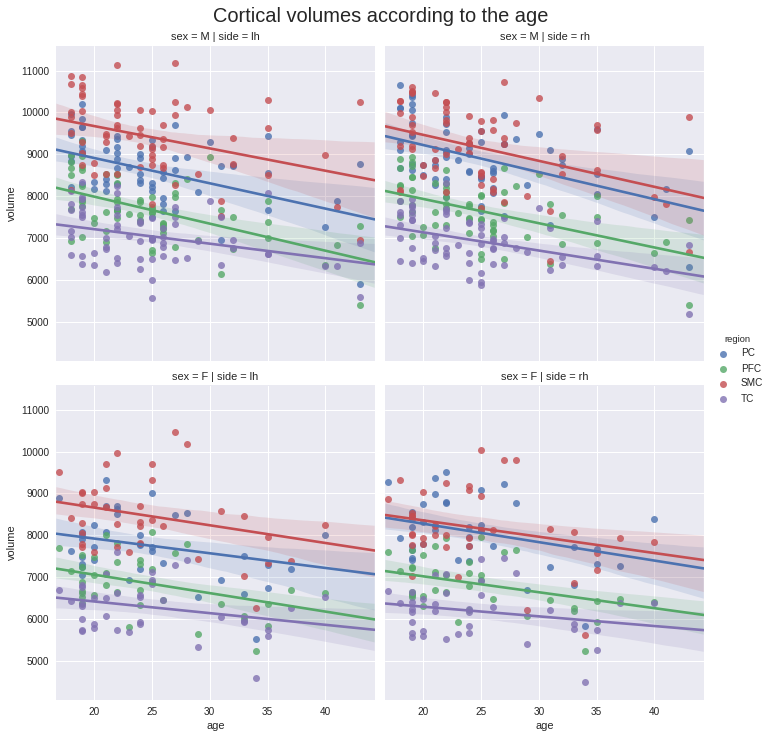

In [9]:
# fig, axes = plt.subplots()
g = sns.FacetGrid(data=pivot_table, col='side', row='sex', hue='region', size=5)
g = (g.map(sns.regplot, 'age','volume').add_legend())
g.fig.suptitle('Cortical volumes according to the age', x=0.5, y=1.02, fontsize=20)
plt.show()

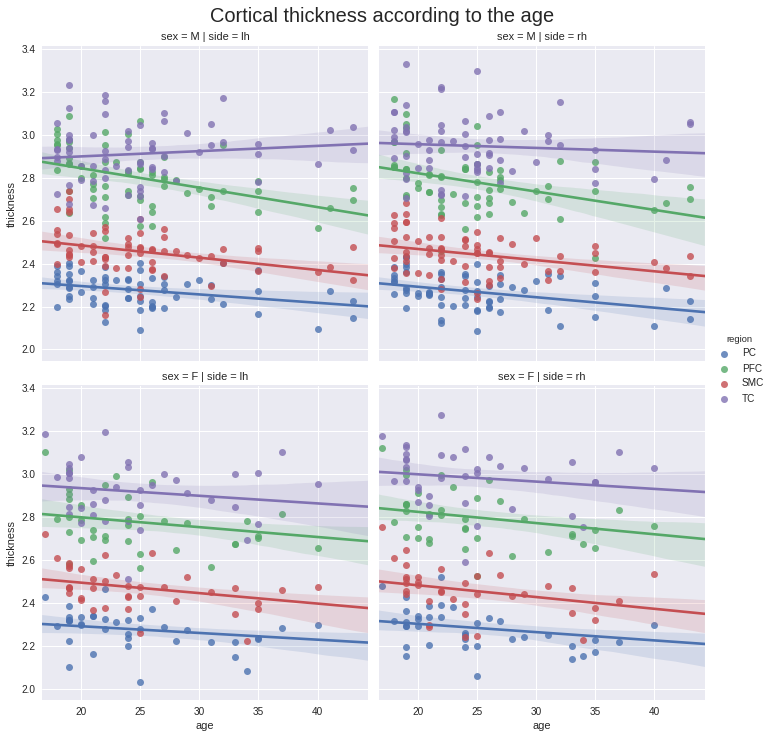

In [10]:
# fig, axes = plt.subplots()
g = sns.FacetGrid(data=pivot_table, col='side', row='sex', hue='region', size=5)
g = (g.map(sns.regplot, 'age','thickness').add_legend())
g.fig.suptitle('Cortical thickness according to the age', x=0.5, y=1.02, fontsize=20)
plt.show()